# ***Exploratory Data Analysis - Terrorism #TASK-4***

***Author:- SUCHIT AGARWAL***

***Data science and buisness analytics internship @SPARKS_FOUNDATION***

***Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’. 
As a security/defense analyst, try to find out the hot zone of terrorism.***

In [1]:
#Importing important libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
#reading the data file using pandas library
dataset = pd.read_csv('C:\\Users\\vasu\\Desktop\\task4\\globalterrorismdb_0718dist.csv',encoding = 'ISO-8859-1')
dataset.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

C:\Users\vasu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dataset = dataset[['Year','Month','Extended','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


In [4]:
dataset.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
dataset.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Extended     181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   state        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   city         181257 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181055 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Target_type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
 18  Motive       50561 non-n

In [13]:
#DESTRUCTIVE FEATURES
print("Country with the most attacks:",dataset['Country'].value_counts().idxmax())
print("City with the most attacks:",dataset['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",dataset['Region'].value_counts().idxmax())
print("Year with the most attacks:",dataset['Year'].value_counts().idxmax())
print("Month with the most attacks:",dataset['Month'].value_counts().idxmax())
print("Group with the most attacks:",dataset['Group'].value_counts().index[1])
print("Most Attack Types:",dataset['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


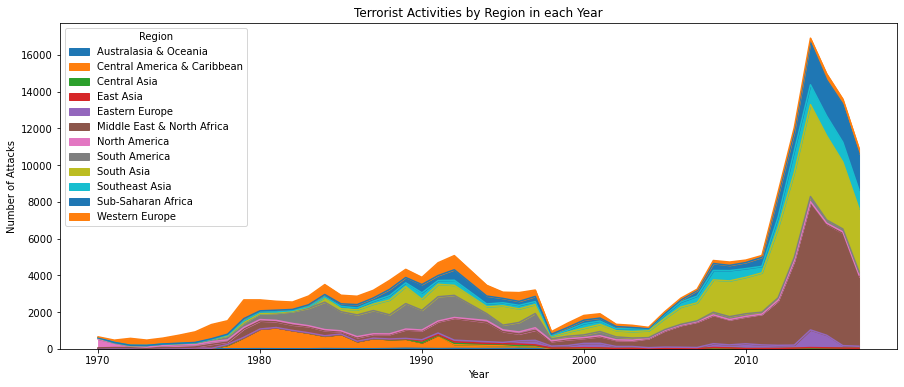

In [14]:
pd.crosstab(dataset.Year, dataset.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

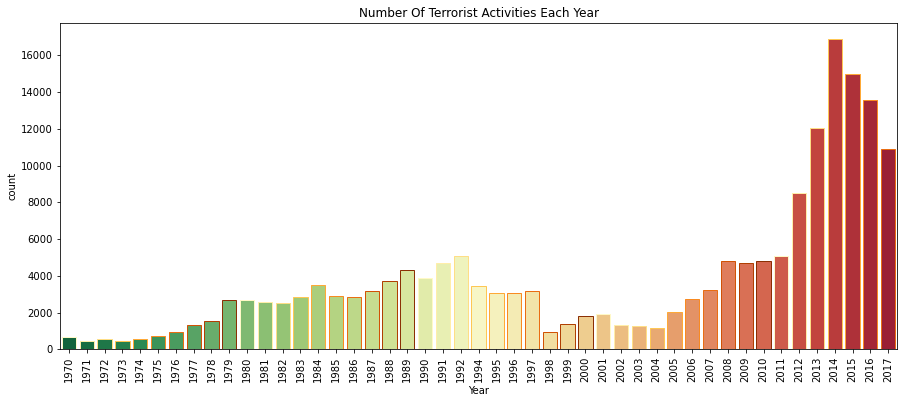

In [17]:

#Number of Terrorist Activities each Year

plt.subplots(figsize=(15,6))
sns.countplot('Year',data=dataset,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [19]:
#History of the Worst Terror Attacks in Heatmap using Plotly

dataset['Wounded'] =dataset['Wounded'].fillna(0).astype(int)
dataset['Killed'] = dataset['Killed'].fillna(0).astype(int)
dataset['casualities'] = dataset['Killed'] + dataset['Wounded']


In [20]:

#Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize

dataset1 = dataset.sort_values(by='casualities',ascending=False)[:40]

In [21]:
heat=dataset1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [23]:
dataset.Country.value_counts()[:15]


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

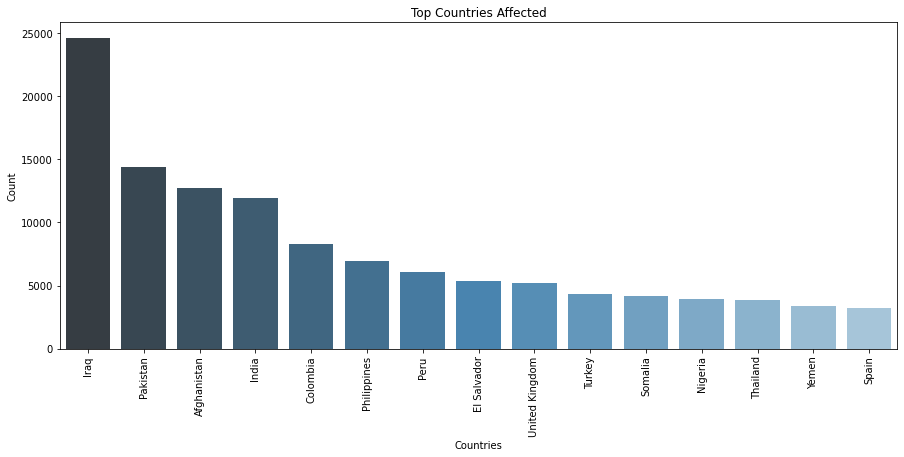

In [24]:
#Top Countries affected by Terror Attacks¶

plt.subplots(figsize=(15,6))
sns.barplot(dataset['Country'].value_counts()[:15].index,dataset['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [25]:
#Now to visualize the top four countries that have suffered the most using bubble charts in Plotly¶

terror_dataset =dataset[(dataset['Group'] != 'Unknown') & (dataset['casualities'] > 50)]
terror_dataset.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
1200,1972,3,0,4,United Kingdom,Northern Ireland,Western Europe,Belfast,54.607712,-5.956210,Bombing/Explosion,2,130,"Janet Bereen, 21 and Anne Owens, 22, Catholics",NaN,Irish Republican Army (IRA),Business,Explosives,NaN,132
1314,1972,5,0,30,Israel,Central,Middle East & North Africa,Lod,32.004361,34.888229,Bombing/Explosion,26,72,Aircraft Terminal,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,98
1789,1973,3,0,8,United Kingdom,England,Western Europe,London,51.504387,-0.140041,Bombing/Explosion,1,238,Court Building,NaN,Irish Republican Army (IRA),Government (General),Explosives,NaN,239
1972,1973,8,0,5,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,5,55,TWA Lounge,NaN,Black September,Airports & Aircraft,Firearms,NaN,60
2138,1973,12,1,17,Italy,Lazio,Western Europe,Rome,41.890961,12.490069,Hostage Taking (Barricade Incident),30,50,Pan Am Lounge and Loading Pan Am 707,NaN,Black September,Airports & Aircraft,Firearms,NaN,80


In [26]:
terror_dataset = terror_dataset.sort_values(['Region', 'Country'])

In [27]:
#It is best to always check for null values and drop the features that are not needed. Atleast it can execute much faster¶

terror_dataset.isnull().sum()

Year              0
Month             0
Extended          0
Day               0
Country           0
state             3
Region            0
city              1
latitude         62
longitude        62
AttackType        0
Killed            0
Wounded           0
Target            9
Summary         517
Group             0
Target_type       0
Weapon_type       0
Motive         1059
casualities       0
dtype: int64

In [28]:
terror_dataset = terror_dataset.drop(['latitude','longitude','Summary','Motive','Target'],axis=1)

In [29]:
terror_dataset = terror_dataset.dropna(subset=['city'])

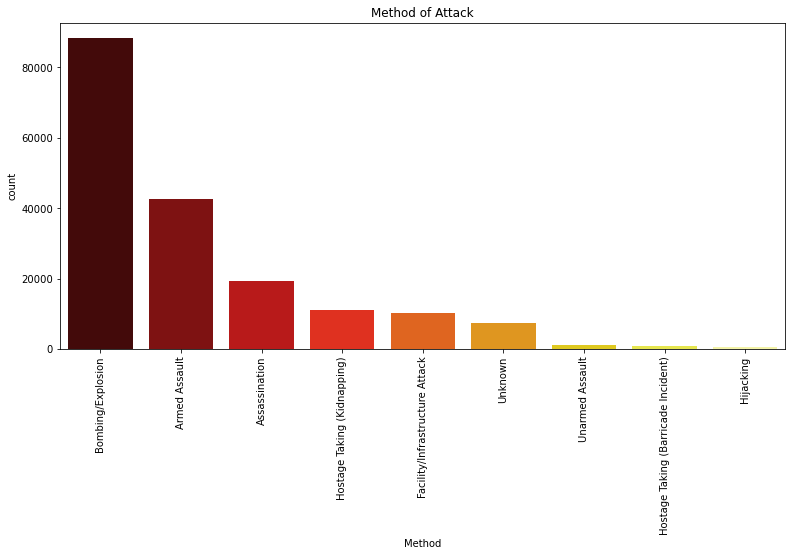

In [30]:
#Methods of attack

plt.figure(figsize=(13,6))
sns.countplot(dataset['AttackType'],data=dataset,order=dataset['AttackType'].value_counts().index,
              palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

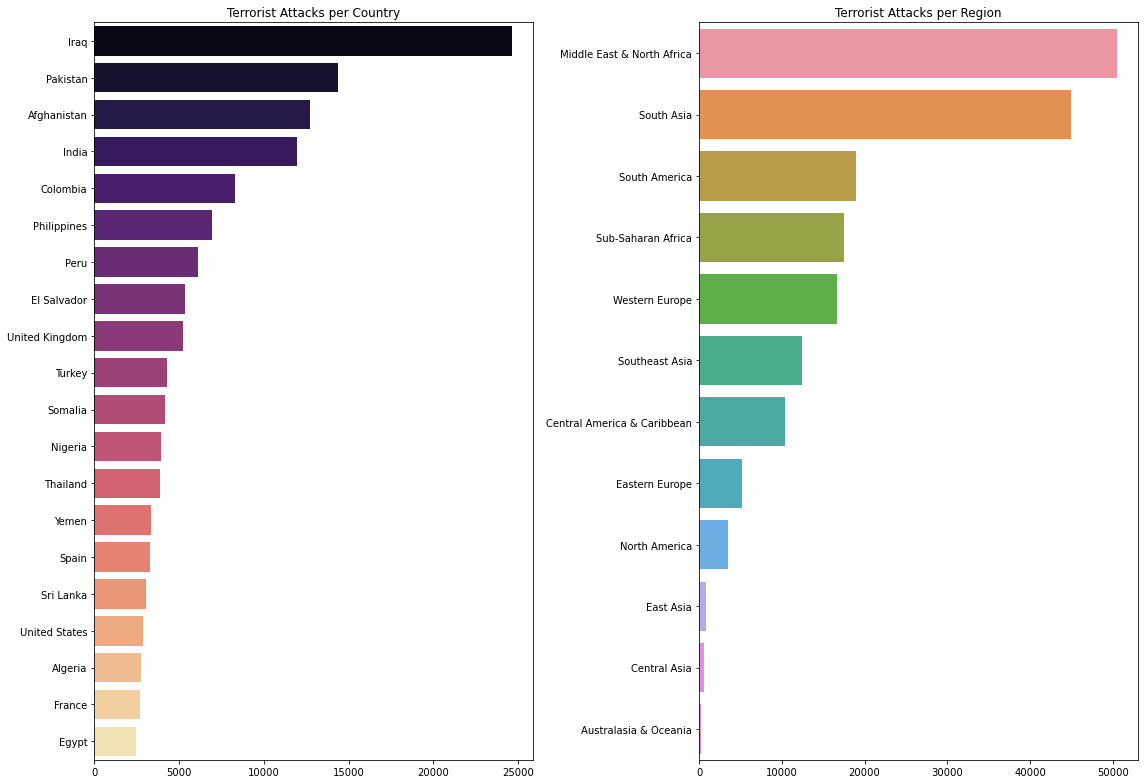

In [31]:
#Country and region

fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = dataset['Country'].value_counts()[:20].values, y = dataset['Country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=dataset['Region'].value_counts().values,y=dataset['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

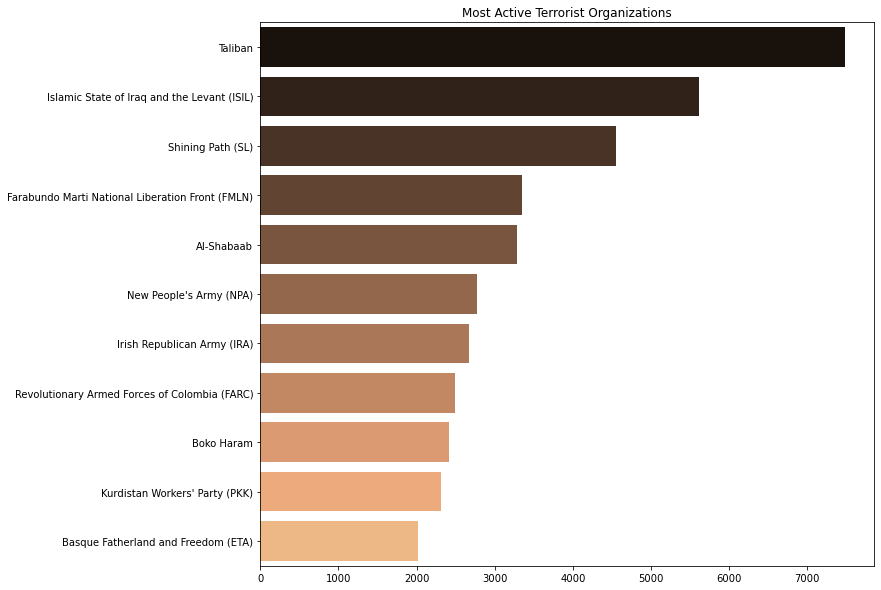

In [33]:
#Most active organizations

plt.subplots(figsize=(11,10))
sns.barplot(y=dataset['Group'].value_counts()[1:12].index,x=dataset['Group'].value_counts()[1:12].values,
           palette='copper')
plt.title('Most Active Terrorist Organizations')
plt.show()

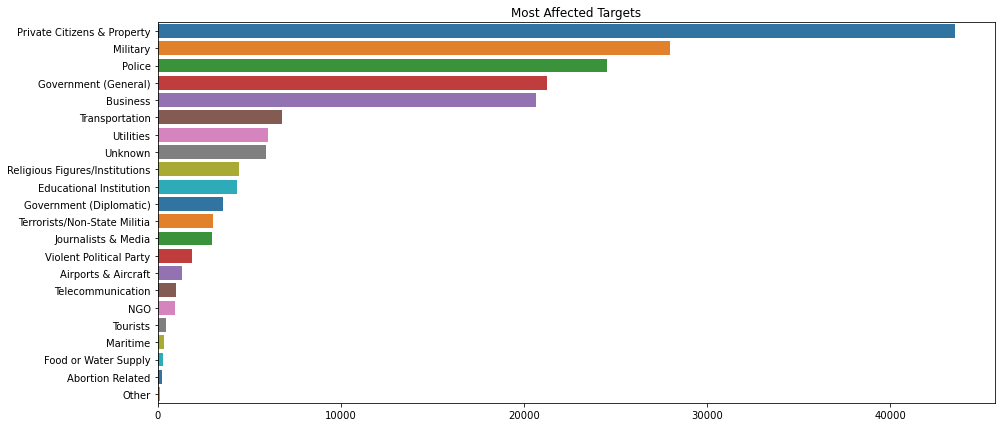

In [34]:
#Most affected targets

plt.subplots(figsize=(15,7))
sns.barplot(y=dataset['Target_type'].value_counts().index,x=dataset['Target_type'].value_counts().values,
           palette='tab10')
plt.title('Most Affected Targets')
plt.show()

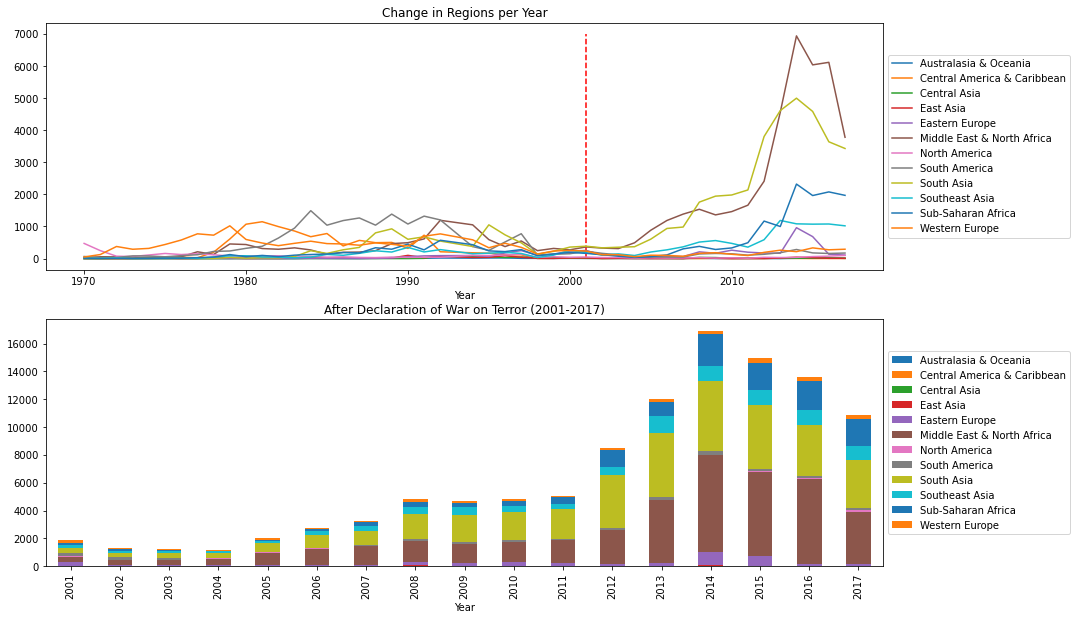

In [35]:
#Before and after the War on Terror

#After the 9/11 attacks in New York City, the US-led War on Terror was launched with the goal to distinguish terrorism primarily in the Middle East. Here, it is shown as a turning point for activity patterns in each region.


dataset_after = dataset[dataset['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(dataset.Year,dataset.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(dataset_after.Year,dataset_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()

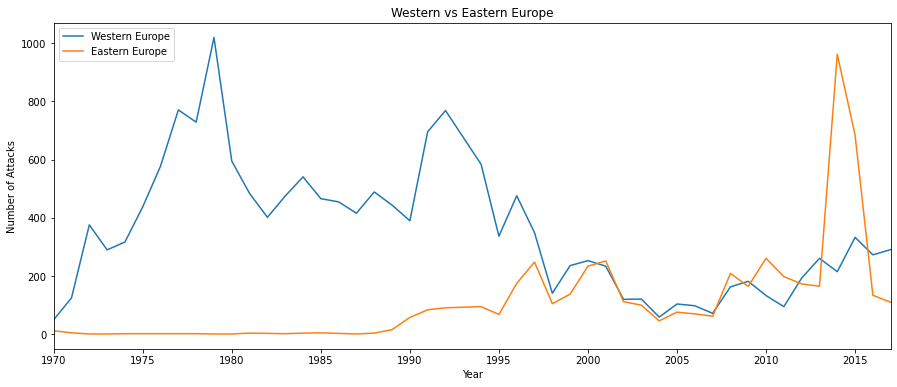

In [36]:
#The shift from Western Europe to Eastern Europe

fig,axes = plt.subplots(figsize=(15,6))
sns.lineplot(dataset[dataset['Region']=='Western Europe']['Year'].value_counts().index,
             dataset[dataset['Region']=='Western Europe']['Year'].value_counts().values)
sns.lineplot(dataset[dataset['Region']=='Eastern Europe']['Year'].value_counts().index,
             dataset[dataset['Region']=='Eastern Europe']['Year'].value_counts().values)
plt.xlabel('Year')
plt.xticks(np.arange(1970,2017,5))
plt.xlim(1970,2017)
plt.ylabel('Number of Attacks')
plt.title('Western vs Eastern Europe')
axes.legend(labels=['Western Europe','Eastern Europe'])
plt.show()


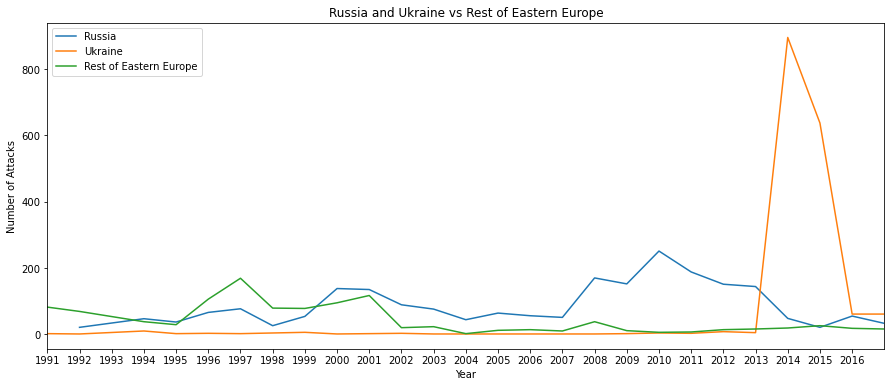

In [38]:
fig,ax = plt.subplots(figsize=(15,6))
russia = dataset[(dataset['Country']=='Russia') & (dataset['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
ukraine = dataset[(dataset['Country']=='Ukraine') & (dataset['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
rest_east = dataset[(dataset['Country']!='Russia') & (dataset['Country']!='Ukraine')
               & (dataset['Region']=='Eastern Europe')& (dataset['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
sns.lineplot(x=russia.index,y=russia.values)
sns.lineplot(x=ukraine.index,y=ukraine.values)
sns.lineplot(x=rest_east.index,y=rest_east.values)
plt.xticks(np.arange(1991,2017,1))
plt.xlim(1991,2017)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Russia and Ukraine vs Rest of Eastern Europe')
ax.legend(labels=['Russia','Ukraine','Rest of Eastern Europe'])
plt.show()

***Are extended attacks more lethal?***

***Extended attacks are defined as events that last longer than 24 hours. Does a longer timeframe mean a higher rate of casualties? Lets first look at which methods of attack tend to be extended or unextended.***

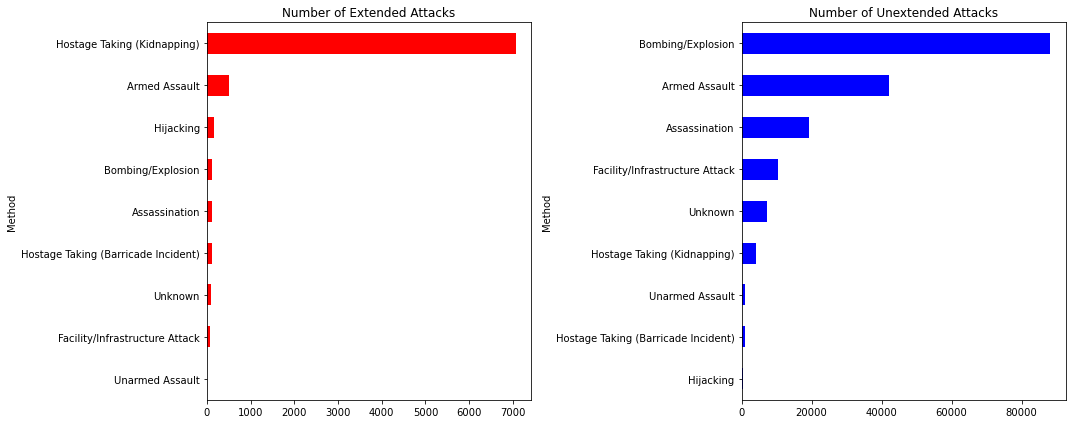

In [39]:
fig,ax = plt.subplots(figsize=(15,6),nrows=1,ncols=2)
ax[0]=dataset[dataset['Extended']==1].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='red',ax=ax[0])
ax[1]=dataset[dataset['Extended']==0].groupby('AttackType').count()['Extended'].sort_values().plot.barh(color='blue',ax=ax[1])
ax[0].set_title('Number of Extended Attacks')
ax[0].set_ylabel('Method')
ax[1].set_title('Number of Unextended Attacks')
ax[1].set_ylabel('Method')
plt.tight_layout()
plt.show()